In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [3]:
# Create a custom function for data transformation
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


# reading file from 9/22 dataset
df4 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)

C:\Users\twolf\AppData\Local\Temp\ipykernel_17520\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_17520\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_17520\17026926.py:3: SettingWithCopyWarning: 
A valu

In [5]:
#Combine files
df = pd.concat([first_file,second_file, df1, df2, df3, df4]).reset_index()

# Dataframe for Surface Taxi Maneuver

In [6]:
df_s = df.copy()
df_s['surface'] = 0

df_s.loc[(df_s['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['surface']] = 1
df_s.loc[(df_s['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['surface']] = 1
df_s.loc[(df_s['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['surface']] = 1
df_s.loc[(df_s['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['surface']] = 1
df_s.loc[(df_s['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['surface']] = 1

In [7]:
df_s['surface'].value_counts()

0    6583
1     637
Name: surface, dtype: int64

# Edit DF for ML, Class Balance, Select features

In [8]:
#Edit the model features to whatever you want to include in your model
all_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque', 'surface']

df_s = df_s[all_features]

In [9]:
df1 = df_s[(df_s['surface'] == 0)].sample(n=637, replace=False, random_state=123458)
df2 = pd.concat([df_s[(df_s['surface'] == 1)], df1], ignore_index = True)
df2 = df2.sample(frac=1)

In [10]:
df2['surface'].value_counts()

1    637
0    637
Name: surface, dtype: int64

In [11]:
df2.head()

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,surface
154,1.0,0.386531,270.137857,11.604612,-0.721184,0.933694,-32.757939,-5.767143,36.149816,3.176469,45.626163,38.395143,38.395143,1
1244,0.0,2252.375208,153.137229,102.187854,-1103.274125,3.000000,-17.399354,-2.241854,30.872062,30.169167,50.784771,45.805604,45.805604,0
501,1.0,0.308684,70.627342,13.338237,-2.059053,0.533342,-8.020974,0.779316,35.620632,2.590316,45.569395,38.162632,38.162632,1
379,1.0,0.355952,58.757595,10.210238,0.744452,0.217405,-1.231905,4.186310,34.004381,0.104762,44.446929,36.164571,36.164571,1
149,1.0,0.315208,267.120458,3.133375,1.089000,-0.109771,-31.177250,-2.347958,35.475104,-4.042250,44.951687,36.602688,36.602688,1


In [12]:
df2[['hasWeightOnWheels','surface']]

,hasWeightOnWheels,surface
154,1.0,1
1244,0.0,0
501,1.0,1
379,1.0,1
149,1.0,1
...,...,...
1087,1.0,0
646,1.0,0
625,1.0,1
526,1.0,1


# SVM Surface Taxi

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.utils import resample

In [27]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['surface']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [28]:
#SVC
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm = SVC()


svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.9596


In [16]:
y_pred=svm.predict(X_test)

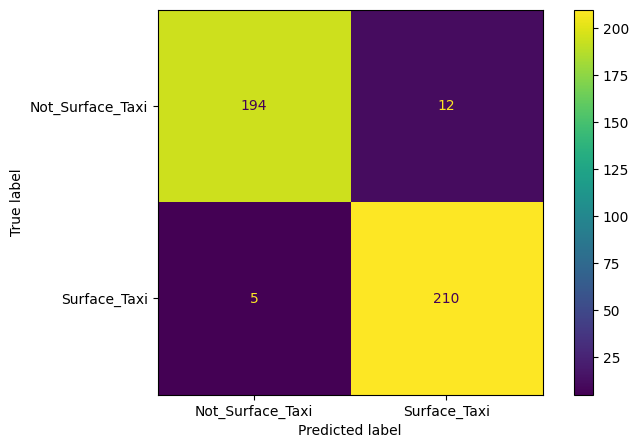

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Surface_Taxi', 'Surface_Taxi'])
cmp.plot(ax=ax)
plt.show()

In [18]:
#Verify display labels are right
y_test.value_counts()

1    215
0    206
Name: surface, dtype: int64

In [29]:
import pickle

In [30]:
pickle.dump(svm, open('surface_minmax_svm.pkl', 'wb'))

In [32]:
pickle.dump(scaler, open('surface_minmax_scaler.pkl', 'wb'))

In [19]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['surface']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [20]:
#SVM standard 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()
#y_pred=svm.predict(X_test)

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.9620


In [21]:
y_pred=svm.predict(X_test)

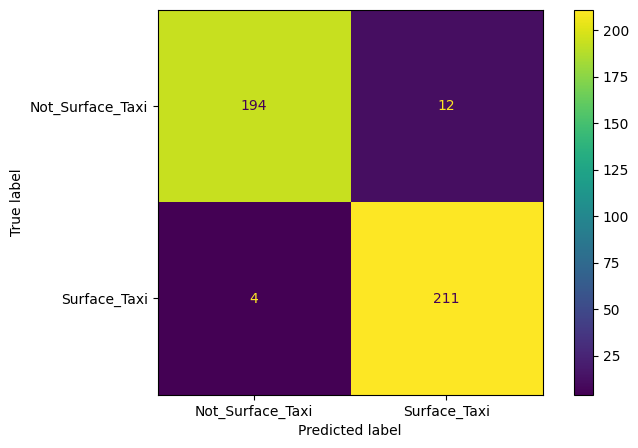

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Surface_Taxi', 'Surface_Taxi'])
cmp.plot(ax=ax)
plt.show()

In [23]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['surface']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [24]:
#SVM standard 
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()
#y_pred=svm.predict(X_test)

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.7886


In [25]:
y_pred=svm.predict(X_test)

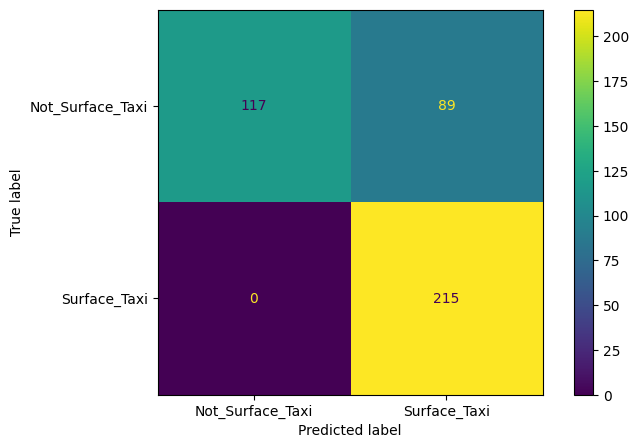

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Surface_Taxi', 'Surface_Taxi'])
cmp.plot(ax=ax)
plt.show()

# Load New Data For Validation

In [33]:
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


In [34]:
# reading files from 10/20 dataset
dfN = pd.read_csv('SimData_2022.10.27_17.55.06.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
dfN = df_transformation(dfN)

C:\Users\twolf\AppData\Local\Temp\ipykernel_17520\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [35]:
dfN

,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,roll,...,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,2022-10-27 21:55:13,21.313929,-157.922891,0.870909,134.719545,144.159182,0.449000,4.332081,0.586455,-0.350455,...,12.618455,0.000000,-0.214636,1.155455,6.131182,39.020636,3.475909,0.000000,-5.230545,-5.230545
1,2022-10-27 21:55:14,21.313928,-157.922887,6.472619,132.314905,141.754690,1.674000,5.335079,1.496333,-0.672667,...,221.704976,0.000000,-0.999024,-5.519619,0.719667,41.945690,3.433810,0.000000,-5.113571,-5.113571
2,2022-10-27 21:55:15,21.313926,-157.922876,10.811778,127.513511,136.953289,2.736089,5.568375,2.619756,-0.767600,...,313.391089,0.000000,-2.070711,-3.777622,-3.853044,30.654422,3.319000,0.000000,-2.735644,-2.735644
3,2022-10-27 21:55:16,21.313924,-157.922867,2.150000,123.090535,132.530326,0.773209,7.594625,0.613023,0.213791,...,-234.672465,0.093023,-2.402744,18.029047,-2.357721,3.893837,3.245419,0.000000,-1.523651,-1.523651
4,2022-10-27 21:55:17,21.313923,-157.922866,0.218750,120.877275,130.317100,0.186050,1.535733,-0.038750,-0.042225,...,-206.549975,0.725000,-2.181100,-3.997700,2.004950,3.652075,3.135700,0.000000,-0.729425,-0.729425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,2022-10-27 22:18:45,21.323876,-157.923547,0.170000,256.499000,265.940000,0.000000,0.000000,-1.168000,0.777000,...,0.000000,1.000000,0.000000,-85.666515,4.159000,3.455000,9.319000,44.236000,35.611000,35.611000
1413,2022-10-27 22:18:46,21.323876,-157.923547,0.169677,256.442839,265.883710,0.024000,0.023986,-1.160774,0.803935,...,-0.003323,1.000000,-0.013871,-85.837323,3.738645,3.455000,9.319000,21.404516,22.875581,22.875581
1414,2022-10-27 22:18:47,21.323876,-157.923547,0.160000,256.137879,265.578424,0.022152,0.022658,-1.102970,0.983303,...,-0.126000,1.000000,-0.071091,-86.047061,3.724848,3.455000,9.318727,0.000000,-3.935182,-3.935182
1415,2022-10-27 22:18:48,21.323876,-157.923547,0.156061,256.184030,265.624606,0.011970,0.012747,-1.024848,0.979788,...,-0.314152,1.000000,-0.029000,-86.138788,4.372000,3.455000,9.316000,0.000000,-3.125333,-3.125333


In [36]:
dfN['surface'] = 0

dfN.loc[(dfN['datetime'].between('2022-10-27 21:57:45' , '2022-10-27 21:59:45' , inclusive='both')),['surface']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-27 22:00:30' , '2022-10-27 22:04:55' , inclusive='both')),['surface']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-27 22:06:00' , '2022-10-27 22:07:59' , inclusive='both')),['surface']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-27 22:09:03' , '2022-10-27 22:11:12' , inclusive='both')),['surface']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-27 22:13:30' , '2022-10-27 22:17:58' , inclusive='both')),['surface']] = 1

In [38]:
dfN['surface'].value_counts()

1    906
0    511
Name: surface, dtype: int64

In [40]:
df1 = dfN[(dfN['surface'] == 0)].sample(n=511, replace=False, random_state=123458)
df2 = pd.concat([dfN[(dfN['surface'] == 1)], df1], ignore_index = True)
df2 = df2.sample(frac=1)

In [42]:
df2['surface'].value_counts()

1    906
0    511
Name: surface, dtype: int64

In [43]:
#Tune 
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['surface']

In [44]:
svm_loaded = pickle.load(open('surface_minmax_svm.pkl', 'rb'))
scaler_loaded = pickle.load(open('surface_minmax_scaler.pkl','rb'))

In [45]:
#SVC

X_valid = scaler_loaded.transform(X)

In [46]:
validation_svm = svm_loaded.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y,validation_svm))

Accuracy of Model:: 0.9760056457304164


In [ ]:
y_pred=svm.predict(X_valid)